# Chapter 3 - Linear Regression

### ISLR 3장의 Linear Regression Python 실습 

## Linear Regression (선형 회귀분석)##
- Response의 값이 숫자인 labeled 데이타를 이용하는 **Regression** 타입 **Supervised Learning** 모델
- 빨리 돌고, 오랜 시간 많이 연구되어 특성을 잘 알고, 모델의 해석이 쉬워 널리 사용

### 사용할 주요 Python 패키지
- [pandas](http://pandas.pydata.org)  : 데이터 입출력, Munging, & etc.
- [numpy](http://www.numpy.org/)  : 수식 계산 
- [matplotlib](http://matplotlib.org/)  : 시각화 
- [seaborn](https://seaborn.github.io/index.html)  : 시각화 
- **[statsmodels](http://statsmodels.sourceforge.net/)  : 통계모델**
- **[scikit-learn](http://scikit-learn.org/stable)  : 머신러닝** 

### * [Statsmodels](http://statsmodels.sourceforge.net/) 패키지의 모델을 사용해 Linear Regression을 익힌다.*  ###

Statsmodels 의 Linear Regression 모델은 ISLR 책의 R 쓰임새와 비슷하게 사용할 수 있음

- **[R 스타일 formula로 모델 만들기](http://statsmodels.sourceforge.net/stable/example_formulas.html)**

In [1]:
# 패키지 imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf     # R의 formula 식 유사하게 쓰임

from hblee import st,Corrplot    # hblee.py: 웹에서 훔쳤거나, 생각없이 짠 단순 맹한 클래스 & 함수  

# notebook에 직접 그래프를 plot  
%matplotlib inline

In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/home/lee/Programs/anaconda3/bin/python
3.6.0 |Anaconda custom (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
sys.version_info(major=3, minor=6, micro=0, releaselevel='final', serial=0)


### 실행 환경
- Python 3.6.0
- Anaconda 4.3.0
- 추가로 seaborn : "conda install seaborn"
- 추가로 colormap & easydev : "pip install colormap easydev"

In [3]:
np.__version__ , pd.__version__, seaborn.__version__

('1.11.3', '0.19.2', '0.8.0')

In [4]:
# package_list = ['pandas', 'numpy', 'IPython', 'seaborn', 'sklearn', 'matplotlib', 'statsmodels']
# for pack in package_list:
#     statement = 'import ' + pack
#     exec(statement)
#     print ("%s : %s" % (pack, eval(pack).__version__) ) 

## Data Load

- 책에서 사용한 **Advertising** 데이터를 load 함. 
- local 머신에서 로딩할 수도, 또는 웹에서 직접 갖고 올 수도 있다. 로딩하기 전에 데이터 구조를 잘 살핍시다  

In [5]:
# 웹에서 직접 pandas의 DataFrame으로 읽음.  첫째 column을 row index로 사용. 
# 아래의 웹에서 가져 온 csv 파일의 column명이 소문자로 시작하여 에러를 일으킴.  주의...
# advertising = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# or, you can read data as DataFrame from local file system.  
advertising = pd.read_csv('../Data/Advertising.csv', usecols=[1,2,3,4])   
advertising.head()    # advertising.tail() 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
type(advertising)

pandas.core.frame.DataFrame

In [7]:
advertising.shape

(200, 4)

- 200 개의 row (레코드, observation, sample)이 있음. Column은 4 개  

In [8]:
advertising.index , advertising.columns    # row index, column names

(RangeIndex(start=0, stop=200, step=1),
 Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object'))

In [9]:
advertising.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


데이터에 대한 자세한 정보 제공 : 타입, shape, 각 feature/column의 속성   
- **자주 사용하기 바람**

In [10]:
st(advertising)       # R의 str() 같이 동작하도록 만든 간단한 함수  

<class 'pandas.core.frame.DataFrame'> : dimension of (200, 4)
Index: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ...  : int64 

TV         float64  [[230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, ...
Radio      float64  [[37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19...
Newspaper  float64  [[69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11...
Sales      float64  [[22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2...




### 간단한 Exploratory Analysis: 모델링을 하기 전에 데이터의 특성을 살펴본다


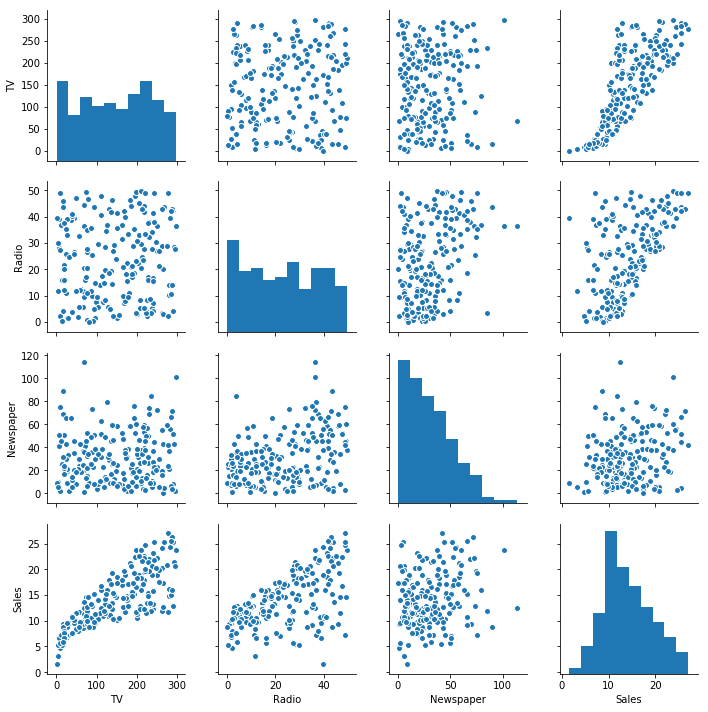

In [11]:
# seaborne 패키지를 이용해 feature들의 scatter plot을 본다  
seaborn.pairplot(advertising)

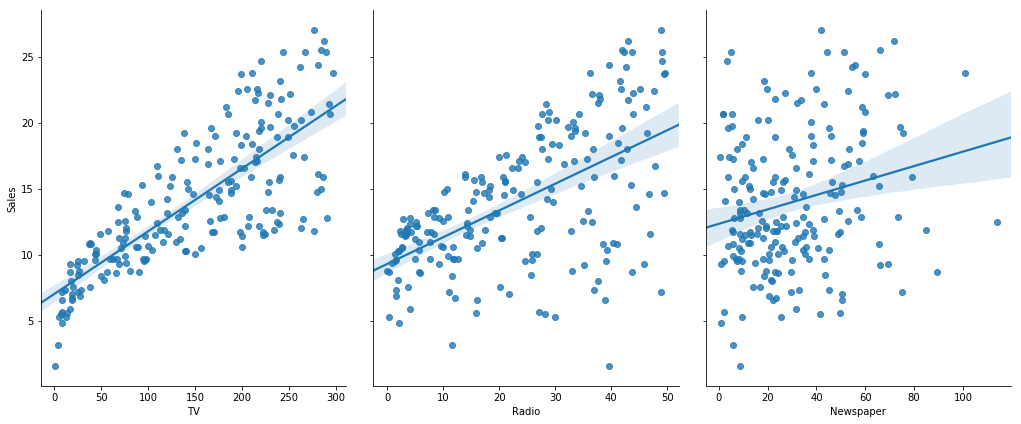

In [12]:
# 'Sales'와 feature들간의 관계만을 scatterplot으로 나타내고, 
# R의 ggplot에서와 같이 regression line과 95% 신뢰대역을 나타내도록 함 ('kind='reg').
seaborn.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], size=6, aspect=0.8, kind='reg')

Computing correlation


/home/lee/Programs/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


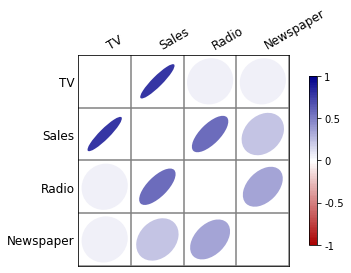

In [13]:
Corrplot(advertising).plot(fontsize='large')    # R style Corrplot 
plt.show()

- Sales와 TV간 ***강한 정비례*** 관계가 있다 

## 3.1 Simple Linear Regression : *feature가 1개*


$Y = \beta_0 + \beta_1X$

- $Y$ : response/output/target 
- $X$ : feature/input/predictor
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $X$

Response(Y)로 *sales*, 1개의 feature(X)를 *TV*로 삼으면, 

$sales = \beta_0 + \beta_1TV$

- $\beta_0$ 와 $\beta_1$ 들을 **model coefficients (또는 weight)** 라 함 
- **simple linear regression의 학습** : **sales**와 **TV** 관계에 가장 맞는(RSS를 최소화하는) 선형식을 구성하는 $\beta_0$와 $\beta_1$을 데이터를 보고 학습해 추정한다

## Estimating the Coefficients of Linear Model 
***Statsmodels*** 을 사용해 **advertising** 데이터에 대한 linear regression 모델의 coefficient 추정
- ### [statsmodels version 0.5](http://statsmodels.sourceforge.net/stable/example_formulas.html) 부터 R 스타일 formula 형태 추가   

## Statsmodels의 Linear Model 사용하기
1. **모델 import** : 우리는 위에서 이미 "import statsmodels.formula.api as smf" 하여 관련 모듈(api)를 'smf' 라는 alias로 가져옴
2. **모델 instantiate** : 클래스 생성자를 이용해 모델을 만듬. 이 때 argument로 regression formula 포함
3. **학습 시킴** : instantiate된 모델 객체에게 fit() 명령을 내려 학습/훈련시키고, 학습된 모델을 반환 받음
4. **학습된 모델 활용** : 학습된 모델을 이용해 새로운 입력에 대해 예측을 하던가 등, 적절한 일거리를 줌


In [14]:
# 1. 모델 import : 모델을 포함하는 모듈을 이미 import 했음  

# 2. Model Instantiation: Ordinary Least Squares (ols) 방식 linear regression 모델 만들기
#    - 입력 데이터는 DataFrame 타입 

lm = smf.ols(formula='Sales ~ TV', data=advertising)   

# 'advertising' DataFrame에서 'Sales' column을 response로, 'TV' column을 feature로 하는
#  linear regression 모델을 정의함 

# 3. 모델에게 학습 시키고, 그 결과인 (학습된) 모델을 'lm_learned'으로 받음 
lm_learned = lm.fit()

# 학습된 모델의 coefficients
lm_learned.params

# lm_learned.pvalues            # p values
# lm_learned.rsquared           # R-squared statistic 

Intercept    7.032594
TV           0.047537
dtype: float64

- **lm_learned._Tab_를 쳐서 'lm_learned' 객체에 어떤 method를 쓸 수 있는 지 보도록**
  

In [15]:
# 보통은 위 2 & 3번 과정을 연결(chaining)함  
lm = smf.ols(formula='Sales ~ TV', data=advertising).fit()   
# 학습한 모델 (즉, fit model)이 만들어졌음

print ("Coeffients:\n%s \n\np-values:\n%s , \n\nr-squared: %s " % (lm.params, lm.pvalues, lm.rsquared))

Coeffients:
Intercept    7.032594
TV           0.047537
dtype: float64 

p-values:
Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64 , 

r-squared: 0.61187505085 


### 다음 두 개의 cell은  response와 feature간의 관계를 시각화하는 또 다른 예 

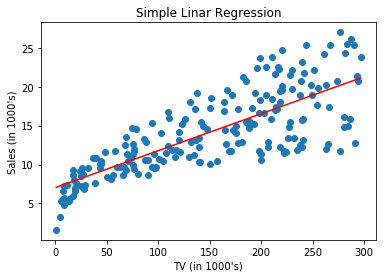

In [16]:
# Sales를 Y-축에, TV 광고비를 X-축에 놓은 scatter plot을 그리자   
plt.scatter(advertising.TV, advertising.Sales)
plt.xlabel("TV (in 1000's)")
plt.ylabel("Sales (in 1000's)")

# 위 plot에 simple regression 선을 overlay 
X = pd.DataFrame({'TV':[advertising.TV.min(), advertising.TV.max()]})
Y_pred = lm.predict(X)
plt.plot(X, Y_pred, c='red')
plt.title("Simple Linar Regression")

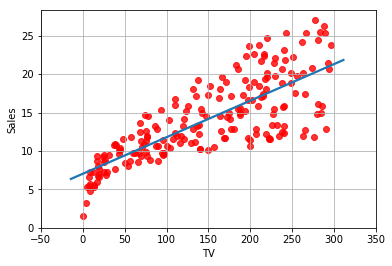

In [17]:
# seaborn 패키지를 이용할 수도 
seaborn.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r'})
plt.xlim(-50,350)
plt.ylim(ymin=0)
plt.grid()

In [18]:
lm.summary()     #  모델 전체 요약. R의 summary() 함수와 비슷 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           1.47e-42
Time:                        01:26:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# ISLR - Table 3.1
lm.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,7.0326,0.458,15.360,0.000,6.130 7.935
TV,0.0475,0.003,17.668,0.000,0.042 0.053


In [20]:
st(advertising)

<class 'pandas.core.frame.DataFrame'> : dimension of (200, 4)
Index: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ...  : int64 

TV         float64  [[230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, ...
Radio      float64  [[37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19...
Newspaper  float64  [[69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11...
Sales      float64  [[22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2...


## 학습된 모델 활용: 예측과 관련 이슈 들 
- 위에서 만든 모델 lm은 Advertising의 TV 변수만을 feature로 사용해 만들었음
- 위의 R-squared 값 0.612 이나 Residual은 모델을 만들 때 사용한 데이터 (Training set)를 이용해 구한 Training Performance  
- 예측분석의 목표는 training set에 대해 좋은 성능을 보이는 모델을 만듬이 아니라, 처음 보게 될 (미래)의 out-of-sample 데이터에 대해 좋은 성능을 보일 것 같은 모델을 만드는 것 (즉, generalize 잘 하여 out-of-sample 성능이 좋은 모델)
- 미래의 데이터가 지금 존재하지 않는데 현재의 모델이 미래에 어떻게 동작할 지 짐작할 수 있을까? -> **모델 평가 **


#### 예측 : 만들어진 모델 (lm)을 이용해 새로운 predictor 값 (TV)을 줄 때 'Sales' 예측은? 
- 가령, TV = 100 일 때 Sales 예측

In [21]:
# statsmodel formula 인터페이스는 입력을 pandas의 DataFrame 같은 array 형태 데이터 구조로 주어야 함 
x_new = pd.DataFrame({'TV': [100]})    # dictionary로 df를 만드는 일반 방법 
# x_new.info()
x_new.head()

,TV
0,100


### 4. 예측 : 아래에서와 같이 'predict' 메소드를 이용 
- ** predict() 의 입력이 DataFrame 같이 array 형태로 training에 사용했던 feature들을 갖고 있어야 함**

In [22]:
lm.predict(x_new)    # 결과인 예측치를 numpy의 ndarray로 반환 

array([ 11.78625759])

### 손으로 계산하여 확인하면; 
$$y = \beta_0 + \beta_1x$$
$$y = 7.0326 + 0.0475 \times x$$

In [23]:
sales_manual = lm.params.Intercept + lm.params.TV * 100
print("Manual Calculation : %6f" % sales_manual)

Manual Calculation : 11.786258


In [24]:
X_new = pd.DataFrame({'TV': [100, 422, 74]})   # TV가 100, 422, 또는 74일때 Sales 예측은? 
lm.predict(X_new)

array([ 11.78625759,  27.09305581,  10.55030494])




# Multiple Linear Regression

**multiple linear regression**: 여러 feature들을 사용해 response 추정 

$Y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$

***Advertising***의 TV, Radio, Newspaper들을 feature로 하고, Sales를 response로 한 multiple linear regression :

$Sales = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$


In [25]:
lm_mul = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=advertising).fit()
lm_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           1.58e-96
Time:                        01:26:39   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 결과 해석
- F statistic의 p-value가 매우 작으므로 (1.58e-96)  모델은 유효 (최소한 1개 이상의 variable이 response와 관련)
- TV와 Radio의 p-value는 의미있음.  하지만 Newspaper의 p-value는 0.86에 달하므로 "Newspaper가 response와 관련이 없다"라는 null-hypothesis를 거부할 수 없음. 따라서 Newspaper 변수를 모델에 포함하기에는 적합하지 않음 
- **R-squared**가 0.89로 simple linear regression (0.612) 때보다 증가. 이 모델이 최소한 simple linear regression 보다 traning set의 response를 더 잘 설명(예측)한다고 생각할 수 있음. 
- 주의: 이 R-squared는 모델을 만들 때 데이터 (즉, training set에)에 대해서 구한 것이기에 실제 환경에서도 (out-of-sample) 더 좋은 특성을 보이는 지는 확신할 수 없음 
- **Cross-validation**와 같은 평가 방법을 통해 모델이 **out-of-sample**에 대해서도 **generalize** 잘 할까 짐작해 볼 수 있음 --> 나중에 

In [26]:
lm_mul.summary().tables[1]               # Table 3.4 of ISLR 

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,2.9389,0.312,9.422,0.000,2.324 3.554
TV,0.0458,0.001,32.809,0.000,0.043 0.049
Radio,0.1885,0.009,21.893,0.000,0.172 0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013 0.011


In [27]:
advertising.corr()     # Table 3.5 of ISLR : correlation matrix (상관 관계)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## 3.3   Other Considerations in the Regression Model

### Qualitative Predictors

In [28]:
# Load 'credit' data from local file system 
credit = pd.read_csv('../Data/Credit.csv', usecols=list(range(1,12)))
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


- 위 feature들의 data type (dtypes)에서 float64, int64와 같이 숫자가 아닌 'object' 인 것들은 대부분 string 또는 다른 클래스 타입. 이것들이 category 타입 변수일 가능성 많음.
- Feature중 Gender, Student, Married, Ethnicity 변수가 qualitative(categorical) 변수
- 400개의 row/observation이 있는데, 모든 feature들이 400 개의 non-null 값을 지님. 즉, missing value가 없음

In [29]:
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [30]:
credit.isnull().sum()           # 다시 missing value 없음을 확인 

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

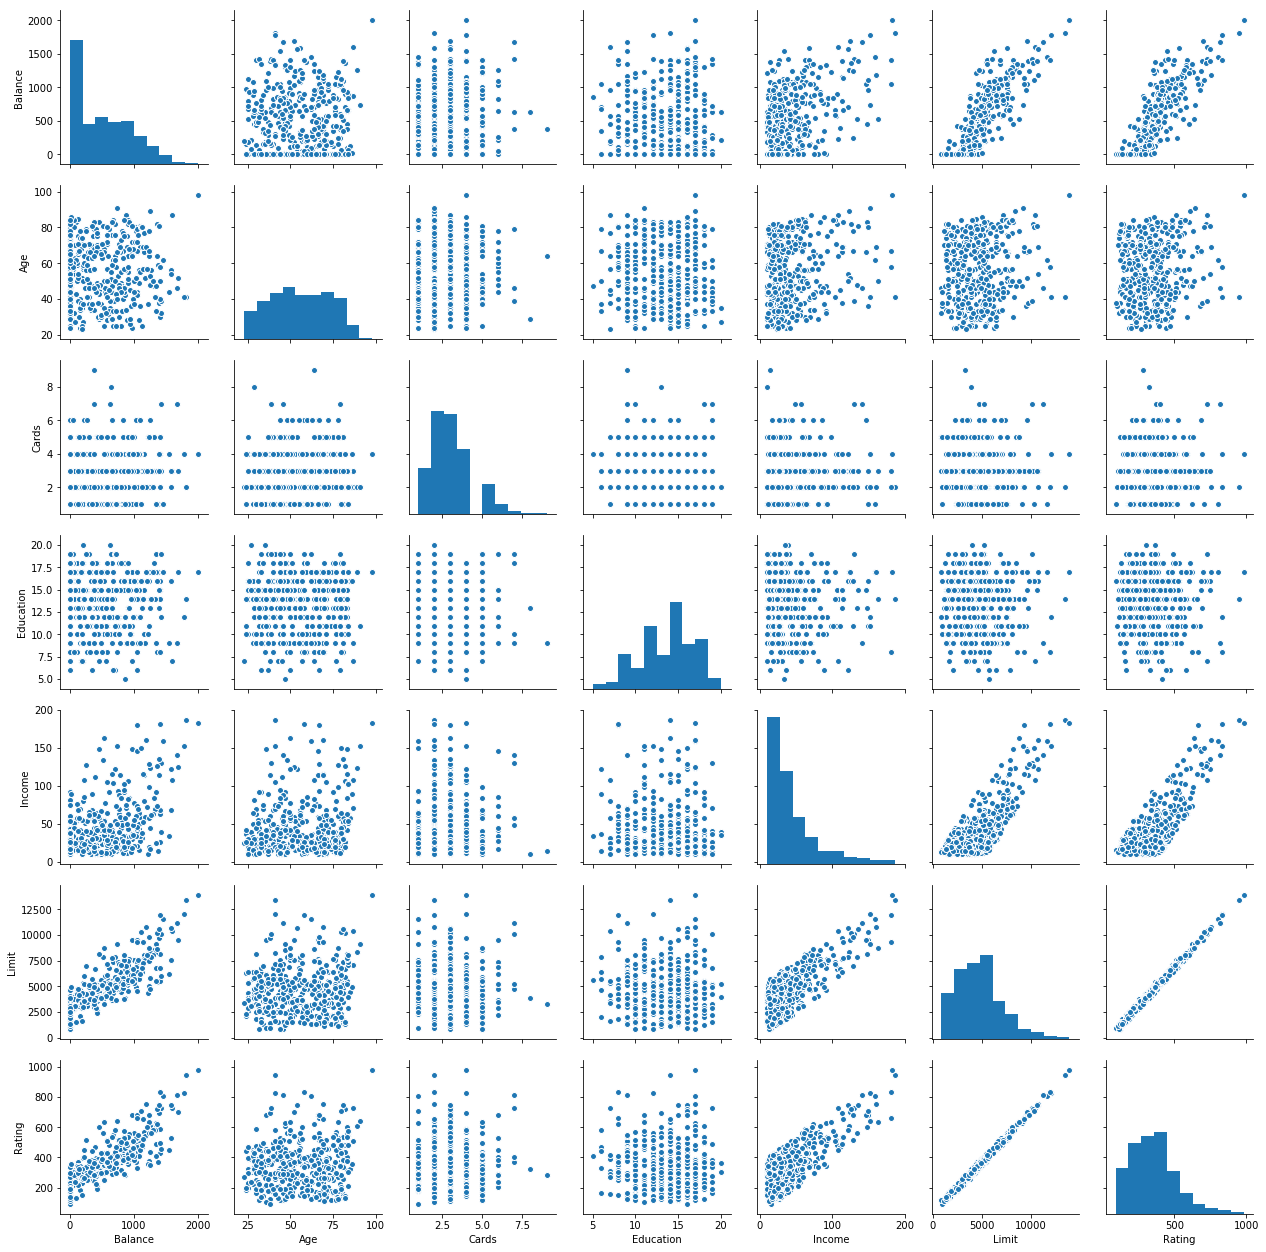

In [31]:
seaborn.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])  # ISLR - Fig 3.6
# 실행 시간이 조금 걸림.  Wait.

Computing correlation


/home/lee/Programs/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


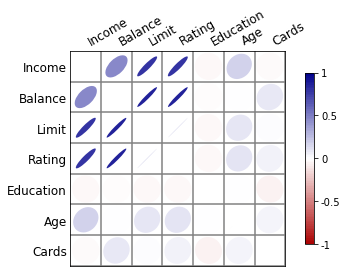

In [32]:
Corrplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]).plot(fontsize='large')     
plt.show()

Interpreting the ***corrplot***
- 파란색(붉은색)으로 갈수록 Positive(Negative) Correlation
- 긹죽한 타원형태가 될수록 correlation이 강함   

In [33]:
credit.Gender.unique()               # Gender 변수는 단 2개의 category를 갖음    

array([' Male', 'Female'], dtype=object)

## 카테고리형 변수 'Gender'를 feature로 활용

In [34]:
lm_cat = smf.ols(formula='Balance ~ Gender', data=credit).fit()   # Gender has 2 levels -> 1 dummy variable
lm_cat.summary().tables[1]          # ISLR - Table 3.7  

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,509.8031,33.128,15.389,0.000,444.675 574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801 110.267


In [35]:
# Regression of Balance onto Ethnicity
lm_cat_Eth = smf.ols('Balance ~ Ethnicity', credit).fit()
lm_cat_Eth.summary()            # Table 3.8 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Tue, 21 Nov 2017   Prob (F-statistic):              0.957
Time:                        01:26:49   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000       439.939   622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774      -146.515   109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826      -123.935    98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- F-statistic p-value가 0.957에 달해 'Balance와 Ethnicity간 관련이 없다'는 null hypothesis를 거부할 수 없기에 이 데이터에 따르면 null hypothesis를 따른는 것이 좋다.  즉, 이 모델은  **꽝!**

In [36]:
st(credit)

<class 'pandas.core.frame.DataFrame'> : dimension of (400, 11)
Index: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ...  : int64 

Income     float64  [[14.890999999999998, 106.025, 104.59299999999...
Limit        int64  [[3606, 6645, 7075, 9504, 4897, 8047, 3388, 71...
Rating       int64  [[283, 483, 514, 681, 357, 569, 259, 512, 266,...
Cards        int64                            [[2, 3, 4, 5, 1, 6, 7]]
Age          int64  [[34, 82, 71, 36, 68, 77, 37, 87, 66, 41, 30, ...
Education    int64  [[11, 15, 16, 10, 12, 9, 13, 19, 14, 7, 17, 8,...
Gender      object                                  [[ Male, Female]]
Student     object                                        [[No, Yes]]
Married     object                                        [[Yes, No]]
Ethnicity   object             [[Caucasian, Asian, African American]]
Balance      int64  [[333, 903, 580, 964, 331, 1151, 203, 872, 279...


**변수들 중 'Ethnicity'만 제외하려면 - formula에 feature 다 나열하기 귀찮음. 뒤에... **

In [37]:
lm_all = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married', credit).fit()
lm_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     918.2
Date:                Tue, 21 Nov 2017   Prob (F-statistic):          2.49e-256
Time:                        01:26:49   Log-Likelihood:                -2399.4
No. Observations:                 400   AIC:                             4819.
Df Residuals:                     390   BIC:                             4859.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         -468.4037     34.355    -13.634      0.000      -535.948  -400.859
Gender[T.Female]   -10.4067      9.904     -1.051      0.294       -29.879     9.065
Student[T.Yes]     426.4692     16.678     25.571      0.000       393.680   459.259
Married[T.Yes]      -7.0191     10.278     -0.683      0.495       -27.226    13.188
Income              -7.8020      0.234    -33.349      0.000        -8.262    -7.342
Limit                0.1931      0.033      5.909      0.000         0.129     0.257
Rating               1.1023      0.489      2.253      0.025         0.140     2.064
Cards               17.9233      4.332      4.137      0.000         9.406    26.441
Age                 -0.6347      0.293     -2.164      0.031        -1.211    -0.058
Education           -1.1150      1.596     -0.699      0.485        -4.253     2.023
==============================================================================
Omnibus:                       34.234   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.854
Skew:                           0.775   Prob(JB):                     1.34e-09
Kurtosis:                       3.217   Cond. No.                     3.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


## Removing the Additive Assumptions : 변수간 Interaction 

In [38]:
# TV와 Radio간 interaction term을 주고 linear model을 만들면
lm_interact = smf.ols('Sales ~ TV + Radio + TV:Radio', advertising).fit()
lm_interact.summary().tables[1]             # Table 3.9

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,6.7502,0.248,27.233,0.000,6.261 7.239
TV,0.0191,0.002,12.699,0.000,0.016 0.022
Radio,0.0289,0.009,3.241,0.001,0.011 0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001 0.001


- TV와 Radio간 interaction이 유효



In [39]:
smf.ols('Sales ~ TV*Radio', advertising).fit().summary().tables[1]      # 앞의 formula를 이렇게 표현 가능  

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,6.7502,0.248,27.233,0.000,6.261 7.239
TV,0.0191,0.002,12.699,0.000,0.016 0.022
Radio,0.0289,0.009,3.241,0.001,0.011 0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001 0.001


In [40]:
smf.ols('Sales ~ TV + Newspaper*Radio', advertising).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     426.6
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           3.25e-95
Time:                        01:26:50   Log-Likelihood:                -385.95
No. Observations:                 200   AIC:                             781.9
Df Residuals:                     195   BIC:                             798.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept           3.1467      0.437      7.193      0.000         2.284     4.009
TV                  0.0458      0.001     32.746      0.000         0.043     0.049
Newspaper          -0.0094      0.014     -0.688      0.492        -0.036     0.018
Radio               0.1801      0.015     11.930      0.000         0.150     0.210
Newspaper:Radio     0.0003      0.000      0.678      0.498        -0.001     0.001
==============================================================================
Omnibus:                       60.978   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.663
Skew:                          -1.344   Prob(JB):                     1.17e-33
Kurtosis:                       6.313   Cond. No.                     4.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Newspaper와 Radio간 interaction은 유효하지 않음  


### Interaction between qualitative variable and a quantitative variable

In [41]:
# Income(quantitative) 과 Student(qualitative with 2 levels)간 Interaction이 없다하고 모델을 학습하면;
lm_no_interact = smf.ols('Balance ~ Income  + Student', credit).fit()   
lm_no_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           9.64e-29
Time:                        01:26:50   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept        211.1430     32.457      6.505      0.000       147.333   274.952
Student[T.Yes]   382.6705     65.311      5.859      0.000       254.272   511.069
Income             5.9843      0.557     10.751      0.000         4.890     7.079
==============================================================================
Omnibus:                      119.719   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.617
Skew:                           0.252   Prob(JB):                     7.44e-06
Kurtosis:                       1.922   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Income(quantitative) 과 Studen(qualitative with 2 levels)간 Interaction이 있게 만들면;
lm_interact = smf.ols('Balance ~ Income*Student', credit).fit()
lm_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           4.94e-28
Time:                        01:26:50   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Intercept               200.6232     33.698      5.953      0.000       134.373   266.873
Student[T.Yes]          476.6758    104.351      4.568      0.000       271.524   681.827
Income                    6.2182      0.592     10.502      0.000         5.054     7.382
Income:Student[T.Yes]    -1.9992      1.731     -1.155      0.249        -5.403     1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 'Income'과 'Student' 사이의 interaction이 없다고 생각하는 것이 옳으며, 이는 R-square 값이 거의 증가하지 않은 것을 통해서도 짐작할 수 있다.


### Non-linear relationships using polynomial regressions

In [43]:
# load 'Auto' data
auto = pd.read_csv('../Data/Auto.csv')
auto.info()
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**(중요) horsepower 변수가 숫자이어야 함. 그런데, 위의 auto.info()로 본 horsepower 변수 타입이 'object'로 되어 있음.  즉 숫자가 아니라고 함.  auto.head()로 보니 처음에는 분명 숫자.  따라서 horsepower 변수 중간 어디 즈음 숫자가 아닌 것이 있음 **

In [44]:
# Find out which rows have non-numeric value on 'horsepower' column
auto_problem = auto[auto.horsepower.apply(lambda x: not(x.isnumeric()))]
auto_problem

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


5개의 observation 들이 'horsepower' feature에 숫자가 아님.  원본 auto.csv 를 보고 확인  
- 위의 row들을 제거할 수도 있고, 또는 파일을 읽을 때 위의 문제가 있는 row들을 제거하고 읽을 수도 있음 

In [45]:
# Read the data again. This time skipping problematic rows 
auto = pd.read_csv('../Data/Auto.csv', na_values='?').dropna()
auto.info()
auto.iloc[28: 34, :]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
28,9.0,8,304.0,193.0,4732,18.5,70,1,hi 1200d
29,27.0,4,97.0,88.0,2130,14.5,71,3,datsun pl510
30,28.0,4,140.0,90.0,2264,15.5,71,1,chevrolet vega 2300
31,25.0,4,113.0,95.0,2228,14.0,71,3,toyota corona
33,19.0,6,232.0,100.0,2634,13.0,71,1,amc gremlin
34,16.0,6,225.0,105.0,3439,15.5,71,1,plymouth satellite custom


- 문제있는 row들이 제거됨을 확인


### mpg를 $horsepower$ 와  $horsepower^2$ 에 대해 regression 

In [46]:
# OLS regression of mpg onto horsepower and squared(horsepower)
lm_quadratic = smf.ols('mpg ~ horsepower + np.square(horsepower)', data=auto).fit()
lm_quadratic.summary().tables[1]             # ISLR - Table 3.10

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,56.9001,1.800,31.604,0.000,53.360 60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527 -0.405
np.square(horsepower),0.0012,0.000,10.080,0.000,0.001 0.001


In [47]:
# Polynomial regression upto 3'rd degree 
lm_deg3 = smf.ols('mpg ~ horsepower + np.power(horsepower,2) +  np.power(horsepower,3)', data=auto).fit()
lm_deg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     285.5
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           8.41e-98
Time:                        01:26:50   Log-Likelihood:                -1132.8
No. Observations:                 392   AIC:                             2274.
Df Residuals:                     388   BIC:                             2289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
Intercept                  60.6848      4.563     13.298      0.000        51.713    69.657
horsepower                 -0.5689      0.118     -4.824      0.000        -0.801    -0.337
np.power(horsepower, 2)     0.0021      0.001      2.193      0.029         0.000     0.004
np.power(horsepower, 3) -2.147e-06   2.38e-06     -0.903      0.367     -6.82e-06  2.53e-06
==============================================================================
Omnibus:                       16.987   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.528
Skew:                           0.204   Prob(JB):                     3.18e-08
Kurtosis:                       4.395   Cond. No.                     5.53e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R의 poly()같은 함수 만드는 것은 쉬움. 함수로 만들 가치 없음 .

# 3.6 Lab: Linear Regression

##  sanity check

In [48]:
Boston = pd.read_table("../Data/Boston.csv", sep=',')

In [49]:
st(Boston)
Boston.head()

<class 'pandas.core.frame.DataFrame'> : dimension of (506, 14)
Index: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ...  : int64 

crim     float64  [[0.00632, 0.02731, 0.02729, 0.03237, 0.06905,...
zn       float64  [[18.0, 0.0, 12.5, 75.0, 21.0, 90.0, 85.0, 100...
indus    float64  [[2.31, 7.07, 2.18, 7.87, 8.14, 5.96, 2.95, 6....
chas       int64                                            [[0.0]]
nox      float64  [[0.538, 0.469, 0.458, 0.524, 0.499, 0.428, 0....
rm       float64  [[6.575, 6.421, 7.185, 6.998, 7.147, 6.43, 6.0...
age      float64  [[65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96...
dis      float64  [[4.09, 4.9671, 6.0622, 5.5605, 5.9505, 6.0821...
rad        int64                   [[1.0, 2.0, 3.0, 5.0, 4.0, 8.0]]
tax        int64  [[296.0, 242.0, 222.0, 311.0, 307.0, 279.0, 25...
ptratio  float64  [[15.3, 17.8, 18.7, 15.2, 21.0, 19.2, 18.3, 17...
black    float64  [[396.9, 392.83, 394.63, 394.12, 395.6, 386.63...
lstat    float64  [[4.98, 9.14, 4.03, 2.94, 5.33, 5.21, 12.43, 1...
me

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- 모든 column들이 숫자(numeric) 임

In [50]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
Boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [52]:
Boston.columns        # pandas DataFrame 클래스는 'columns' attribute을 갖고 있음 

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

## 3.6.2 medv를 response, lstat를 predictor로 한 simple regression

In [53]:
lm_fit = smf.ols(formula='medv ~ lstat', data=Boston).fit()

In [54]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           5.08e-88
Time:                        01:26:51   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
lstat         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
lm_fit.resid.describe()      # Residuals statistics

count    5.060000e+02
mean     1.832877e-14
std      6.209603e+00
min     -1.516745e+01
25%     -3.989612e+00
50%     -1.318186e+00
75%      2.033701e+00
max      2.450013e+01
dtype: float64

*** 신뢰구간 ***

In [56]:
lm_fit.conf_int(alpha=0.05)      # default alpha=0.05 : 95% confidence interval

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


**[참고](http://statsmodels.sourceforge.net/devel/examples/generated/example_ols.html) : OLS Prediction with confidence interval ** 

In [57]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_new = pd.DataFrame({'lstat':[5,10,15]})
lm_fit.predict(X_new)

array([ 29.80359411,  25.05334734,  20.30310057])

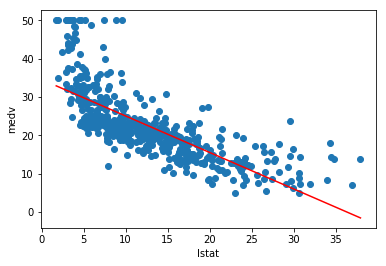

In [58]:
plt.scatter(Boston.lstat, Boston.medv )

X = pd.DataFrame({'lstat':[Boston.lstat.min(), Boston.lstat.max()]})
Y_pred = lm_fit.predict(X)
plt.plot(X, Y_pred, c='red')
plt.xlabel("lstat")
plt.ylabel("medv")

# 3.6.3 Multiple Linear Regression

In [59]:
lm_fit = smf.ols('medv ~ lstat+age', data=Boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           2.98e-88
Time:                        01:26:51   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000        31.787    34.659
lstat         -1.0321      0.048    -21.416      0.000        -1.127    -0.937
age            0.0345      0.012      2.826      0.005         0.011     0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R의 "formula = medv ~ ." 같이 medv를 제외한 다른 모든 column을 predictor로 삼는 간편 식이 python에 없음.  그냥 다음과 같이 하면 됨.

In [60]:
# Response인 'medv'를 제외한 모든 column들을 feature로 삼으려면,
columns_selected = "+".join(Boston.columns.difference(["medv"]))
my_formula = "medv ~ " + columns_selected
my_formula

'medv ~ age+black+chas+crim+dis+indus+lstat+nox+ptratio+rad+rm+tax+zn'

* 단순 조작이기에 함수로 만들 필요 없겠죠...  참고로, formula에서 R 처럼 '-'도 먹힘  

In [61]:
lm_fit = smf.ols(formula = my_formula, data=Boston).fit()

In [62]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 21 Nov 2017   Prob (F-statistic):          6.72e-135
Time:                        01:26:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000        26.432    46.487
age            0.0007      0.013      0.052      0.958        -0.025     0.027
black          0.0093      0.003      3.467      0.001         0.004     0.015
chas           2.6867      0.862      3.118      0.002         0.994     4.380
crim          -0.1080      0.033     -3.287      0.001        -0.173    -0.043
dis           -1.4756      0.199     -7.398      0.000        -1.867    -1.084
indus          0.0206      0.061      0.334      0.738        -0.100     0.141
lstat         -0.5248      0.051    -10.347      0.000        -0.624    -0.425
nox          -17.7666      3.820     -4.651      0.000       -25.272   -10.262
ptratio       -0.9527      0.131     -7.283      0.000        -1.210    -0.696
rad            0.3060      0.066      4.613      0.000         0.176     0.436
rm             3.8099      0.418      9.116      0.000         2.989     4.631
tax           -0.0123      0.004     -3.280      0.001        -0.020    -0.005
zn             0.0464      0.014      3.382      0.001         0.019     0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
lm_fit.resid.describe()       # Residuals statistics

count    5.060000e+02
mean    -3.845813e-13
std      4.683822e+00
min     -1.559447e+01
25%     -2.729716e+00
50%     -5.180489e-01
75%      1.777051e+00
max      2.619927e+01
dtype: float64

In [64]:
# 'age' 를 제외한 다른 모든 변수들을 predictor로 삼으려면
columns_selected = "+".join(Boston.columns.difference(["medv", "age"]))
my_formula = "medv ~ " + columns_selected
lm_fit1 = smf.ols(formula = my_formula, data=Boston).fit()
lm_fit1.summary().tables[1]

,coef,std err,t,P>|t|,[95.0% Conf. Int.]
Intercept,36.4369,5.080,7.172,0.000,26.456 46.418
black,0.0093,0.003,3.481,0.001,0.004 0.015
chas,2.6890,0.860,3.128,0.002,1.000 4.378
crim,-0.1080,0.033,-3.290,0.001,-0.173 -0.043
dis,-1.4786,0.191,-7.757,0.000,-1.853 -1.104
indus,0.0206,0.061,0.335,0.738,-0.100 0.141
lstat,-0.5239,0.048,-10.999,0.000,-0.617 -0.430
nox,-17.7135,3.679,-4.814,0.000,-24.943 -10.484
ptratio,-0.9522,0.130,-7.308,0.000,-1.208 -0.696
rad,0.3058,0.066,4.627,0.000,0.176 0.436


In [65]:
lm_fit1.resid.describe()

count    5.060000e+02
mean     2.973818e-14
std      4.683835e+00
min     -1.560538e+01
25%     -2.731276e+00
50%     -5.187814e-01
75%      1.760098e+00
max      2.622427e+01
dtype: float64

## 3.6.4 Interaction Terms

In [66]:
lm_fit = smf.ols('medv ~ lstat*age', data=Boston).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           4.86e-88
Time:                        01:26:52   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000        33.201    38.976
lstat         -1.3921      0.167     -8.313      0.000        -1.721    -1.063
age           -0.0007      0.020     -0.036      0.971        -0.040     0.038
lstat:age      0.0042      0.002      2.244      0.025         0.001     0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 임의의 test set을 만들어 response를 예측해 봄 

In [68]:
# Interaction term이 있지만 이는 'age'와 'lstat' 변수에서 파생된 것이기에 이 두 변수만 필요함 
test = pd.DataFrame({'age':[65.4, 79, 23], 'lstat':[4.8, 10, 5]})
test

,age,lstat
0,65.4,4.8
1,79.0,10.0
2,23.0,5.0


In [69]:
lm_fit.predict(exog=test)

array([ 30.66386729,  25.39362159,  29.58930643])

- "predict()의 'exog' 같은 단어들은 어디서 유래했을까" 가 궁금하면 [여기로](http://statsmodels.sourceforge.net/devel/endog_exog.html) 

In [70]:
# residual 을 계산해 봄. 모델을 fit할 때 사용하지 않은 변수인 'rm'을 예측 변수로 넣어도 에러 발생 않함 
y_predict = lm_fit.predict(Boston.loc[:,['age', 'lstat',  'rm']])   # training set에 대한 prediction
(Boston.medv - y_predict)[0:5]     

0   -6.458215
1   -4.704760
2    3.242407
3    0.877696
4    6.369921
Name: medv, dtype: float64

In [71]:
lm_fit.resid[:5]            # 위의 결과와 같음 

0   -6.458215
1   -4.704760
2    3.242407
3    0.877696
4    6.369921
dtype: float64

In [72]:
# lm_fit.predict(Boston.loc[:,['age', 'rm']])    
# 'lstat'이 없다고 exception 일으킴 

## 3.6.5 Non-linear Transformation of the Predictors

In [73]:
lm_fit2 = smf.ols('medv ~ lstat + np.power(lstat, 2)', data=Boston).fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 21 Nov 2017   Prob (F-statistic):          1.56e-112
Time:                        01:26:53   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000        41.149    44.575
lstat                 -2.3328      0.124    -18.843      0.000        -2.576    -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000         0.036     0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ANOVA test to compare two models. [(참고)](http://statsmodels.sourceforge.net/devel/generated/statsmodels.stats.anova.anova_lm.html) 

In [74]:
import statsmodels.api as sm

lm_fit = smf.ols('medv ~ lstat', data=Boston).fit()
table = sm.stats.anova_lm(lm_fit, lm_fit2, typ=1)
print(table)


   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


/home/lee/Programs/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/lee/Programs/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/lee/Programs/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


## 3.6.6 Qualitative Predictors

In [75]:
Carseats = pd.read_csv("../Data/Carseats.csv", index_col=0)
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [76]:
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [77]:
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


In [78]:
columns_selected = "+".join(Carseats.columns.difference(["Sales"]))
my_formula = "Sales ~ Income:Advertising + Price:Age + " + columns_selected  
my_formula

'Sales ~ Income:Advertising + Price:Age + Advertising+Age+CompPrice+Education+Income+Population+Price+ShelveLoc+US+Urban'

In [79]:
lm_fit = smf.ols(my_formula, data=Carseats).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 21 Nov 2017   Prob (F-statistic):          6.14e-166
Time:                        01:26:53   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000         4.592     8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000         4.548     5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000         1.706     2.201
US[T.Yes]              -0.1576      0.149     -1.058      0.291        -0.450     0.135
Urban[T.Yes]            0.1402      0.112      1.247      0.213        -0.081     0.361
Income:Advertising      0.0008      0.000      2.698      0.007         0.000     0.001
Price:Age               0.0001      0.000      0.801      0.424        -0.000     0.000
Advertising             0.0702      0.023      3.107      0.002         0.026     0.115
Age                    -0.0579      0.016     -3.633      0.000        -0.089    -0.027
CompPrice               0.0929      0.004     22.567      0.000         0.085     0.101
Education              -0.0209      0.020     -1.063      0.288        -0.059     0.018
Income                  0.0109      0.003      4.183      0.000         0.006     0.016
Population              0.0002      0.000      0.433      0.665        -0.001     0.001
Price                  -0.1008      0.007    -13.549      0.000        -0.115    -0.086
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [81]:
Carseats_training = Carseats.loc[:,'CompPrice':]
# Carseats_training

In [82]:
lm_fit.predict(Carseats_training)[:5]       # training set feature를 이용해 training set response 추정  

array([  7.25155178,  12.22190446,   9.17309518,   8.44242764,   6.06916727])

In [83]:
(Carseats.Sales - lm_fit.predict(Carseats_training)).describe()    # residual statistics w.r.t. training set

count    4.000000e+02
mean    -2.958256e-12
std      9.940033e-01
min     -2.920817e+00
25%     -7.502943e-01
50%      1.767764e-02
75%      6.754104e-01
max      3.341301e+00
Name: Sales, dtype: float64

-----------------------------------------------------------------------------

# [scikit-learn](http://scikit-learn.org/stable/) 
- ### Python을 위한 High-Level 머신러닝 libaray
- ### 체계적 구조(사용법)에 따른 편의성/재사용성, 짜증 감소에 따른 스트레스 저하 
- ### 예술적 수준의 [Documentation](http://scikit-learn.org/stable/user_guide.html)
- ### 확장성, 유연성, 합리성, 유머, 전반적 높은 수준 SW, 우수한 자동화 및 Production System화, Contribution하고 싶은 마음을 일으키며  
- ### 다른 언어나 다른 Python 머신 러닝 library에 비교해 불편한 점도 있으나 위와 같은 장점이 돋보임 


## Scikit-learn이 지원하는 머신러닝 알고리즘 및 적합한 알고리즘 선택 요령
<img src="http://scikit-learn.org/stable/_static/ml_map.png">

-----------------------------------------------------------------

# scikit-learn [Linear Regression](http://scikit-learn.org/stable/modules/linear_model.html)

### 말 그대로 가장 밋밋한 Linear Regression 알고리즘인 [Ordinary Least Squares Linear Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) 연습 - 3장의 Linear Regression 내용은 이것으로 다 됨 

## 간략 scikit-learn [소개](http://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting)
- 학습 모델(알고리즘)을 **estimator** 라 함. 정확한 정의는: an estimator is a Python object that implements the methods fit(X, y) and predict(T) 

### scikit-learn의 estimator들은 데이터에 대해 다음과 같은 조건을 요구함
1. feature와 response가 각각 독립적인 객체
2. feature와 response가 숫자
3. feature와 response가 NumPy ndarray이거나 또는 DataFrame, Python array같이 쉽게 ndarray로 변환 가능 해야 함. 또한, scipy의 sparse matrix를 허용.
4. feature는 2-D ndarray로 shape가 (n_samples, n_features) 이어야 함. Response는 'n_samples' 길이의 vector 이어야 함.  

## scikit-learn의 estimator 사용 패턴  
### 1. estimator를 import 
  - ***from  sklearn.linear_model  import  LinearRegression***
  <br> 
  
### 2. instantiate the estimator ###
  - ***model = LinearRegression()*** : instantiate할 때 estimator에서 hyperparameter를 지정해 튜닝
    <br>
    
### 3. estimator에게 데이터(X:feature, y:response)를 제공해 학습시킴 (모델 traing/fit  ###
  - ***model.fit(X, y) ***    : fit가 in-place 진행, 즉 결과가 model 내부에 저장됨 
    <br>
    
### 4. 학습된 estimator에 새로운 데이터의 feature(X_new)를 주고 response를 추정 ### 
  - ***y_predict = model.predict(X_new) *** 


## Advertising 데이터를 이용

### 1. Estimator (여기서는 'LinearRegression')을 갖고 옴 

In [84]:
from sklearn.linear_model import LinearRegression   # sklearn : scikit-learn 을 말함 
# from sklearn import datasets         

### 'LinearRegression' estimator가 쓸 수 있도록 data 구조 만들기 

In [85]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [86]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


- Sales를 response, 나머지 TV, Radio, Newspaper를 feature 삼으려 함
- response와 feature들이 모두 숫자 --> scikit-learn의 data 조건-2 만족

In [87]:
# X 와 y  각각 만들기 
X = advertising.loc[ :, ['TV', 'Radio', 'Newspaper'] ]   # DataFrame 타입 
y = advertising.Sales
print(X.head(), '\n')
print(X.values[:5], '\n')
print(type(X.values))

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4 

[[ 230.1   37.8   69.2]
 [  44.5   39.3   45.1]
 [  17.2   45.9   69.3]
 [ 151.5   41.3   58.5]
 [ 180.8   10.8   58.4]] 

<class 'numpy.ndarray'>


- pandas의 DataFrame 객체는 데이터를 numpy.ndarray 형태로 내부에 갖고 있다

In [88]:
X.shape , X.values.shape         # DataFrame X의 모양, 내부 ndarray의 모양이 같음  

((200, 3), (200, 3))

In [89]:
type(y)

pandas.core.series.Series

In [90]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [91]:
y.values

array([ 22.1,  10.4,   9.3,  18.5,  12.9,   7.2,  11.8,  13.2,   4.8,
        10.6,   8.6,  17.4,   9.2,   9.7,  19. ,  22.4,  12.5,  24.4,
        11.3,  14.6,  18. ,  12.5,   5.6,  15.5,   9.7,  12. ,  15. ,
        15.9,  18.9,  10.5,  21.4,  11.9,   9.6,  17.4,   9.5,  12.8,
        25.4,  14.7,  10.1,  21.5,  16.6,  17.1,  20.7,  12.9,   8.5,
        14.9,  10.6,  23.2,  14.8,   9.7,  11.4,  10.7,  22.6,  21.2,
        20.2,  23.7,   5.5,  13.2,  23.8,  18.4,   8.1,  24.2,  15.7,
        14. ,  18. ,   9.3,   9.5,  13.4,  18.9,  22.3,  18.3,  12.4,
         8.8,  11. ,  17. ,   8.7,   6.9,  14.2,   5.3,  11. ,  11.8,
        12.3,  11.3,  13.6,  21.7,  15.2,  12. ,  16. ,  12.9,  16.7,
        11.2,   7.3,  19.4,  22.2,  11.5,  16.9,  11.7,  15.5,  25.4,
        17.2,  11.7,  23.8,  14.8,  14.7,  20.7,  19.2,   7.2,   8.7,
         5.3,  19.8,  13.4,  21.8,  14.1,  15.9,  14.6,  12.6,  12.2,
         9.4,  15.9,   6.6,  15.5,   7. ,  11.6,  15.2,  19.7,  10.6,
         6.6,   8.8,

In [92]:
type(y.values)

numpy.ndarray

In [93]:
# y.values.head()     # error.  이유는 head()는 pandas DataFrame, Series 메소드. numpy.ndarray에 안됨 
y.values[:5]

array([ 22.1,  10.4,   9.3,  18.5,  12.9])

In [94]:
y.shape

(200,)

In [95]:
y.values.shape       # pandas and numpy classes both support shape() method 

(200,)

### DataFrame과 Series는 데이터를 내부에서 numpy.ndarray로 관리.  
- *** scikit-learn estimator들은 DataFrame과 Series 데이터 구조도 받아드린다***

### 2. Estimator를 instantiate 

In [96]:
model = LinearRegression()

### 3. Estimator를 훈련  

In [97]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 학습된 Estimator 살펴보기 :
- model.[Tab] 을 하여 어떤 메소드가 있는 지 보자

In [98]:
print(model.coef_)            # feature matrix 'X'의 feature 순서대로, 즉 TV', 'Radio', 'Newspaper'
list(zip(X.columns, model.coef_ ))

[ 0.04576465  0.18853002 -0.00103749]


[('TV', 0.045764645455397587),
 ('Radio', 0.18853001691820459),
 ('Newspaper', -0.0010374930424762452)]

- 앞에 statsmodels linear model의 결과와 같음 

In [99]:
model.intercept_

2.9388893694594085

In [100]:
model.residues_             # Residual sum of squares (RSS).  0.18에 생겼는데 0.19에 deprecate   

/home/lee/Programs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


556.82526290218698

- scikit-learn에서 coef\_, intercept\_  같이 estimator attribute명 뒤에 '_'가 붙은 것은 (학습된) 모델의 attribute임을 나타냄. 따라서 학습되지 않은 estimator에 위 멤버를 요청하면 에러    

In [101]:
model.score(X, y, sample_weight=None)         # R-squared 

0.89721063817895208

### 4. Predict (예측/추정) : response 추정 
- 앞 단계에서 estimator가 훈련을 통해 학습이 됨
- 이 estimator로 feature가 입력될 때 response를 추정해 본다 

In [102]:
# training 할 때 사용한 X를 그대로 feature로 삼아 response를 보자
y_pred = model.predict(X)
pd.DataFrame({'y_True': y, "y_pred": y_pred}).head(10)     

,y_True,y_pred
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672
5,7.2,12.478348
6,11.8,11.729760
7,13.2,12.122953
8,4.8,3.727341
9,10.6,12.550849


In [103]:
# RSS manual 계산과 비교  
np.square(y - y_pred).sum(), model.residues_


/home/lee/Programs/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


(556.8252629021873, 556.82526290218698)

In [104]:
X.tail()

,TV,Radio,Newspaper
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [105]:
X.values[-5:]

array([[  38.2,    3.7,   13.8],
       [  94.2,    4.9,    8.1],
       [ 177. ,    9.3,    6.4],
       [ 283.6,   42. ,   66.2],
       [ 232.1,    8.6,    8.7]])

### 기본적으로 predict 메소드의 입력 feature는 numpy ndarray이어야 함

In [106]:
X_new = np.array([[45.4, 12, 44]])     # One observation with features TV, Radio, Newspaper order 
X_new.shape

(1, 3)

- X_new가 2D ndarray 이어야 함.  X_new는 1x3 array.  column 배열이 estimator를 훈련시킬 때의 X column 순서와 같아야 함  

### 새로운 feature에 대한 response 추정 

In [107]:
model.predict(X_new)

array([ 7.23331478])

### predict()는 입력 feature로 DataFrame과 Python array도 잘 받아드린다.  단 2D 이어야 함

In [108]:
X_new = pd.DataFrame([[45.4, 12, 44]])
model.predict(X_new)              # OK

array([ 7.23331478])

In [109]:
X_new = [[45.4, 12, 44]]
model.predict(X_new)             # OK

array([ 7.23331478])

In [110]:
X_new

[[45.4, 12, 44]]

In [111]:
X_new = [45.4, 12, 44]
model.predict(X_new)         # 아직은 됨.  곧 에러로 취급한다고.  2D array로 만드라는 말 

/home/lee/Programs/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 7.23331478])

In [112]:
X_new = pd.Series([45.4, 12, 44])      # 위와 같은 주의    
model.predict(X_new)

/home/lee/Programs/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 7.23331478])

### 추천 ###
#### predict()에 feature array를 줄 때 가능한 DataFrame으로 주자. DataFrame은 2D 데이터 구조이고, 보통 column name도 함께 쓰기에 에러도 준다.  
그러나 주의할 점도 있음

In [113]:
X_new = pd.DataFrame({'TV':[34,44,56], 'Radio':[123,55,23], 'Newspaper':[23,40,121]})
X_new

,Newspaper,Radio,TV
0,23,123,34
1,40,55,44
2,121,23,56


In [114]:
# 내부 ndarray를 보면,
X_new.values

array([[ 23, 123,  34],
       [ 40,  55,  44],
       [121,  23,  56]])

#### X_new의 column 순서가 처음  X_new를 dictionary로 만들 때의 순서와 다름.   이는 Python Dictionary가 순서 개념이 없기 때문임.  원래 순서 TV, Radio, Newspaper 순으로 순서를 맞추어 predict() 메소드에 주어야 함

In [115]:
X.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [116]:
X_new = X_new[X.columns]          # X_new의 column 순서를 X 순서에 따라 재배열 함      
X_new.values

array([[ 34, 123,  23],
       [ 44,  55,  40],
       [ 56,  23, 121]])

In [117]:
model.predict(X_new)

array([ 27.66021706,  15.28018498,   9.71236325])

#### [Lesson] predict()에게 주는 데이터를 만드는 등, 중요한 ndarray를 만들 경우 녀석이 내가 생각했던 그대로 되어있나 확인하자

***Note***

[scikit-learn OLS API reference](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) 에 있듯이 이 estimator는 **F-statitic, p-value, confidence interval** 등을 기본 제공하지 않음. 또한, statsmodels과 같이 categorical 변수, interaction, 변수를 non-linear (polynomial) 변환 적용 등이 공짜가 아님. 

물론, 이런 모든 것들을 변수들을 미리 preprocessing 하여 가능함. statsmodels이나 R의 모델들은 categorical feature가 있을 시 자동적으로 preprocessing 해 준 것임.  

scikit-learn과 Python 생태계는 매우 다양하고 강력한 preprocessing library/기능을 제공함.  

이 estimator를 파생/확장하여 **categoric 변수지원, interaction 지원, F-statitic, p-value, confidence interval** 등을 제공하는 것은 쉬우나 이는 Python 이나 SW 철학에 어긋남 **(공부하여, 이해하고, 인정하고, 고마와하며 갖다 쓰면 되지, 같은 것을 다시 만들 이유는 없음). 필요하면 statsmodels 쓰면 됨.**

ISLR 6장에는 여기에서 배운 것의 심화 내용이 있음. 모두 어렵지 않은 내용임. 6장의 내용도 scikit-learn이 잘 지원함.   

** 단순하거나, 복잡하거나, preprocessing을 어떻게 했던지 기본적으로 모든 linear 모델은 response와 feature들간에 linear한 관계가 있을 때 잘 동작함 **  
    

## 동영상 참고 

- [Hastie & Tibshirani의 Ch.3 강의](https://www.youtube.com/watch?v=PsE9UqoWtS4&list=PL5-da3qGB5IBSSCPANhTgrw82ws7w_or9) : ISLR 저자들의 강의  
- Kevin Markham의 [scikit-learn 강의](https://www.youtube.com/playlist?list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A) : 쉽게, 친절하게 함
- [Jake VanderPlas: Machine Learning with Scikit Learn](https://www.youtube.com/watch?v=HC0J_SPm9co) : Linear Regression 에 관한 것은 아니나 scikit-learn 으로 iris classficiation에 관한 tutorial 
- [Machine Learning with Scikit Learn | SciPy 2015 Tutorial | Andreas Mueller & Kyle Kastner Part I](https://www.youtube.com/watch?v=80fZrVMurPM) : scikit-learn Machine Learning 전반에 관한 tutorial 
- 위 강의들과 함께 있는 url들을 따라 가보도록.  



#### 마지막으로,

In [118]:
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


In [119]:
all_features = '+'.join(Carseats.columns.difference(['Sales']))
my_formula = "Sales ~ " + all_features + " - Population - Education + ShelveLoc:Advertising + Income:Advertising"
print("formula = ", my_formula)
lm_Carseats = smf.ols(formula = my_formula, data=Carseats).fit() 
lm_Carseats.summary() 

formula =  Sales ~ Advertising+Age+CompPrice+Education+Income+Population+Price+ShelveLoc+US+Urban - Population - Education + ShelveLoc:Advertising + Income:Advertising


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     227.1
Date:                Tue, 21 Nov 2017   Prob (F-statistic):          8.23e-167
Time:                        01:26:57   Log-Likelihood:                -565.42
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     387   BIC:                             1209.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------------
Intercept                           5.6339      0.519     10.849      0.000         4.613     6.655
ShelveLoc[T.Good]                   4.8258      0.217     22.206      0.000         4.399     5.253
ShelveLoc[T.Medium]                 2.0352      0.174     11.680      0.000         1.693     2.378
US[T.Yes]                          -0.1546      0.146     -1.056      0.292        -0.442     0.133
Urban[T.Yes]                        0.1299      0.112      1.160      0.247        -0.090     0.350
Advertising                         0.0762      0.027      2.796      0.005         0.023     0.130
ShelveLoc[T.Good]:Advertising       0.0043      0.023      0.188      0.851        -0.041     0.049
ShelveLoc[T.Medium]:Advertising    -0.0114      0.019     -0.594      0.553        -0.049     0.026
Age                                -0.0458      0.003    -14.406      0.000        -0.052    -0.040
CompPrice                           0.0931      0.004     22.634      0.000         0.085     0.101
Income                              0.0109      0.003      4.207      0.000         0.006     0.016
Price                              -0.0952      0.003    -35.929      0.000        -0.100    -0.090
Income:Advertising                  0.0008      0.000      2.701      0.007         0.000     0.001
==============================================================================
Omnibus:                        0.927   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.822
Skew:                           0.110   Prob(JB):                        0.663
Kurtosis:                       3.034   Cond. No.                     7.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
print("exit with 0")

exit with 0
